# 

# Introduction
This project aims to analyze transactional data to answer key business questions related to customer segmentation and revenue optimization. By leveraging unsupervised learning techniques (clustering), we aim to identify distinct groups of customers based on their transaction behaviors, revenue contributions, and geographical regions. This segmentation will help guide marketing strategies, optimize revenue streams, and potentially identify areas for cost reduction.

# Data Wrangling

In this section, we shall explore and uncover insights from the data. This section will be divided into 4 sub categories;
    •Importing libraries 
    • Data Loading
    • Data Exploration to gain an understanding of its structure, size, and content.
    • Data Cleaning
    • Data Prepocessing

***Import Necessary Libraries***

In [46]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error

***Load the dataset***

In [2]:
# Load the dataset
df = pd.read_csv("C:\\Users\\immac\\OneDrive\\Documents\\2024\\Internship\\Fygo Labs Internship\\Python Project\\Fact Transactions\\fct_transactions.csv")

In [3]:
# Convert 'transaction_date' to datetime format
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

In [4]:
# Preview the first few rows
df.head()

,transaction_date,transaction_pseudo_id,transaction_reference,user_id,transaction_action,source_region,source_sub_region,source_country_code,source_country,first_name,...,gross_forex_revenue_in_usd,net_forex_revenue_in_usd,forex_cogs_in_usd,gross_fee_revenue_in_usd,net_fee_revenue_in_usd,partner_fee_cogs_in_usd,discount_cost_in_usd,gross_revenue_in_usd,net_revenue_in_usd,total_cogs_in_usd
0,2024-08-24 15:27:18+00:00,NA18f98223b7c3765d267e802bf3feec62,REG6897992,1311987,Wallet Topup,Americas,Northern America,US,United States,Nabeela,...,0.0,0.0,0.0,0.350182,0.0,0.145156,0.0,0.350182,0.205027,0.145156
1,2024-08-24 08:19:36+00:00,NA8fad3394c82d6f06c0bc99b9e340e606,REG6894470,293079,Wallet Topup,Americas,Northern America,US,United States,Joshua,...,0.0,0.0,0.0,0.590000,0.0,0.590000,0.0,0.590000,0.000000,0.590000
2,2024-08-24 23:44:14+00:00,NA0e160bfe2e504f4a3e82c3c91782b0ce,LINK10521508,2221063,Wallet Topup,Africa,Sub-Saharan Africa,BF,Burkina Faso,Sankara,...,0.0,0.0,0.0,0.034193,0.0,0.034193,0.0,0.034193,0.000000,0.034193
3,2024-08-24 01:22:29+00:00,NAdec61160fc12d71e0faa13d34e7e0c1d,LINK10504544,2195086,Wallet Topup,Africa,Sub-Saharan Africa,BF,Burkina Faso,Marc,...,0.0,0.0,0.0,0.034236,0.0,0.034236,0.0,0.034236,0.000000,0.034236
4,2024-08-24 18:03:41+00:00,NAd72185fcaf3713010df0637e8f3718c1,LINK10517281,2229124,Wallet Topup,Africa,Sub-Saharan Africa,BF,Burkina Faso,Abdoul Razak,...,0.0,0.0,0.0,0.034193,0.0,0.034193,0.0,0.034193,0.000000,0.034193


***Basic Data Cleaning and Preprocessing***

In [5]:
# Check the shape of the dataset
print(df.shape)

(20967, 35)


In [6]:
# Check the info of the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20967 entries, 0 to 20966
Data columns (total 35 columns):
 #   Column                              Non-Null Count  Dtype              
---  ------                              --------------  -----              
 0   transaction_date                    20967 non-null  datetime64[ns, UTC]
 1   transaction_pseudo_id               20967 non-null  object             
 2   transaction_reference               20967 non-null  object             
 3   user_id                             20967 non-null  int64              
 4   transaction_action                  20967 non-null  object             
 5   source_region                       20967 non-null  object             
 6   source_sub_region                   20967 non-null  object             
 7   source_country_code                 20963 non-null  object             
 8   source_country                      20967 non-null  object             
 9   first_name                          209

***Handling Missing Values***

In [7]:
df.isnull().sum()

transaction_date                         0
transaction_pseudo_id                    0
transaction_reference                    0
user_id                                  0
transaction_action                       0
source_region                            0
source_sub_region                        0
source_country_code                      4
source_country                           0
first_name                               0
email                                    0
phone_number                             5
acquisition_date                         0
user_type                              291
acquisition_source                       0
first_os                                 0
last_os                                  0
cohort_period                            0
transaction_acquisition_month_diff       0
source_currency                          0
destination_currency                  8634
currency_flow                         8634
transaction_currency_class               0
source_amou

In [8]:
# Impute missing values with median for numerical columns and mode for categorical columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(exclude=[np.number]).columns

# Imputing missing numerical values with median
imputer_num = SimpleImputer(strategy='median')
df[numeric_cols] = imputer_num.fit_transform(df[numeric_cols])

# Imputing missing categorical values with most frequent (mode)
imputer_cat = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = imputer_cat.fit_transform(df[categorical_cols])

In [9]:
# Check that missing values are worked on
df.isnull().sum()

transaction_date                      0
transaction_pseudo_id                 0
transaction_reference                 0
user_id                               0
transaction_action                    0
source_region                         0
source_sub_region                     0
source_country_code                   0
source_country                        0
first_name                            0
email                                 0
phone_number                          0
acquisition_date                      0
user_type                             0
acquisition_source                    0
first_os                              0
last_os                               0
cohort_period                         0
transaction_acquisition_month_diff    0
source_currency                       0
destination_currency                  0
currency_flow                         0
transaction_currency_class            0
source_amount_in_src_curr             0
source_amount_in_usd                  0


In [10]:
# Drop columns that are not needed or non-numeric for PCA
df_numeric = df.select_dtypes(include=['float64', 'int64'])

In [11]:
print(df_numeric.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20967 entries, 0 to 20966
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   user_id                             20967 non-null  float64
 1   phone_number                        20967 non-null  float64
 2   transaction_acquisition_month_diff  20967 non-null  float64
 3   source_amount_in_src_curr           20967 non-null  float64
 4   source_amount_in_usd                20967 non-null  float64
 5   gross_forex_revenue_in_usd          20967 non-null  float64
 6   net_forex_revenue_in_usd            20967 non-null  float64
 7   forex_cogs_in_usd                   20967 non-null  float64
 8   gross_fee_revenue_in_usd            20967 non-null  float64
 9   net_fee_revenue_in_usd              20967 non-null  float64
 10  partner_fee_cogs_in_usd             20967 non-null  float64
 11  discount_cost_in_usd                20967

**Model Building of original data**

In [12]:
# Separate features and target variable (assuming we are predicting `net_revenue_in_usd` as an example)
X = df_numeric.drop(columns=['net_revenue_in_usd'])
y = df_numeric['net_revenue_in_usd']

In [13]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Train Random Forest on Original Dataset**

In [48]:
# Train a Random Forest Regressor on the original data
rf_original = RandomForestRegressor(random_state=42)
rf_original.fit(X_train_scaled, y_train)

# Predict on test data
y_pred_original = rf_original.predict(X_test_scaled)

# Evaluate the model using Mean Squared Error
mse_original = mean_squared_error(y_test, y_pred_original)
print(f"MSE on original data: {mse_original}")


MSE on original data: 0.0783809662895807


### PCA 

In [21]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_theme(style='whitegrid', palette='muted',
        rc={'figure.figsize': (15,10)})

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

**Feature Selection**

In [23]:
# create short list of unwanted columns
labels = ['UserId',]

# declare the features to be all columns, less the unwanted ones from above
features = [col for col in df_numeric.columns if col not in labels]

**Standardising numerical data**

In [29]:
# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the numeric columns in df_numeric
df_PCA = df_numeric.copy()  # To avoid modifying the original dataframe
df_PCA[:] = scaler.fit_transform(df_PCA)

In [30]:
print(df_PCA.head())

    user_id  phone_number  transaction_acquisition_month_diff  \
0 -0.551191     -0.859638                            0.407596   
1 -2.250550     -0.857158                            1.978795   
2  0.964988     -0.850555                           -0.927923   
3  0.921663     -0.850548                           -0.927923   
4  0.978433     -0.850545                           -0.927923   

   source_amount_in_src_curr  source_amount_in_usd  \
0                  -0.069703             -0.095651   
1                  -0.069675             -0.005679   
2                  -0.068353             -0.177164   
3                  -0.068353             -0.177154   
4                  -0.068353             -0.177164   

   gross_forex_revenue_in_usd  net_forex_revenue_in_usd  forex_cogs_in_usd  \
0                   -0.201065                 -0.096198          -0.085369   
1                   -0.201065                 -0.096198          -0.085369   
2                   -0.201065                 -0.0

**Boxplot for the scaled data**

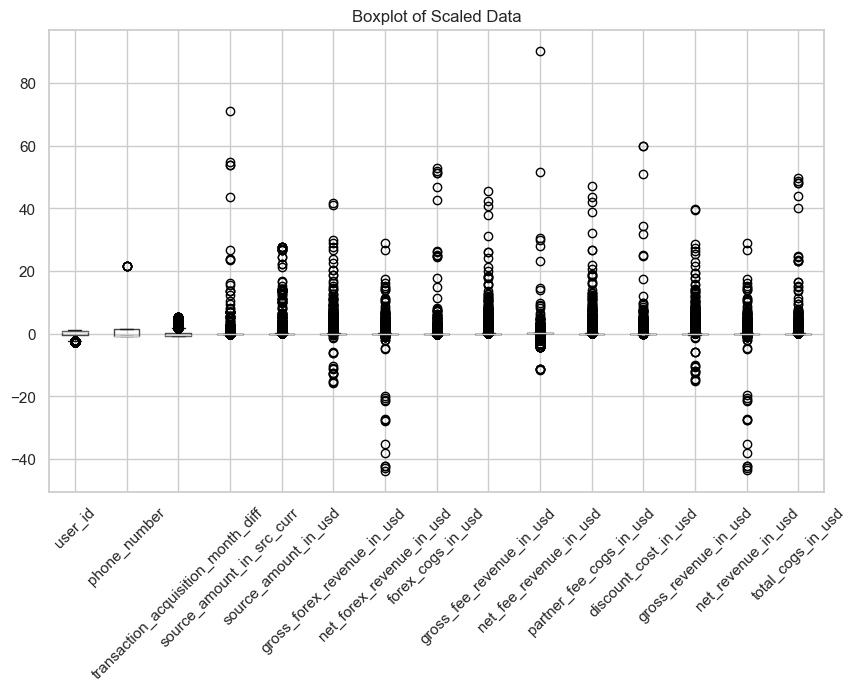

In [33]:
# Plot the boxplot for the scaled data
plt.figure(figsize=(10, 6))
df_PCA[:].boxplot()
plt.xticks(rotation=45)
plt.title("Boxplot of Scaled Data")
plt.show()

**Perform PCA**

In [35]:
pca = PCA()
principal_components = pca.fit_transform(df_PCA)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components)

**Visualize the Cumulative Explained Variance**

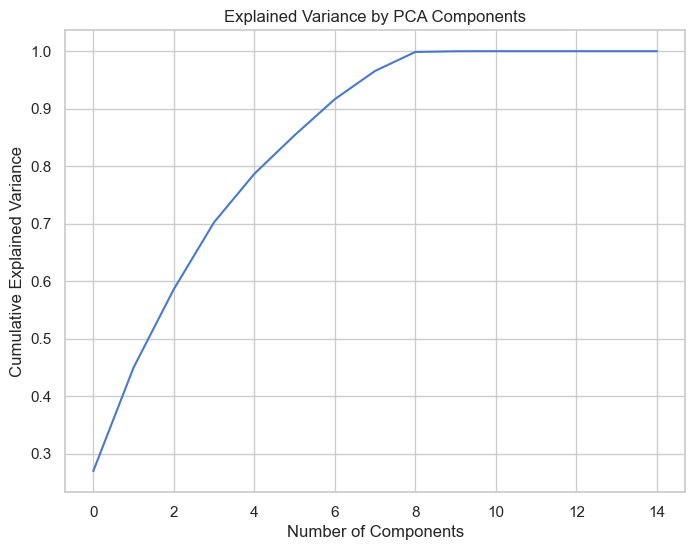

In [36]:
# Plot the cumulative variance explained by the components
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()


6 components could explain 85% of the data

**Decide How Many Components to Keep**

In [38]:
# Let's check what the actual number of components would be for 90% variance retention.
pca_85 = PCA(.85)
pca_85.fit_transform(df_PCA)
print(round(pca_85.explained_variance_ratio_.sum()*100, 1),
      "% of variance explained by",
      pca_85.n_components_,
      "components.")

85.4 % of variance explained by 6 components.


**Analyzing the variance**

In [40]:
pca.explained_variance_ratio_[:3]

array([0.26928692, 0.18012047, 0.13638576])

**Apply PCA**

In [41]:
# Initialize PCA, keeping 85% of the variance
pca = PCA(n_components=0.85)

# Fit PCA on the scaled training data
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Check how much variance is explained by each principal component
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance by each component: {explained_variance}")


Explained Variance by each component: [0.21902357 0.19189336 0.14578203 0.12458643 0.08840075 0.07235239
 0.06747965]


**Train Random Forest on PCA-Reduced Dataset**

In [43]:
# Initialize the Random Forest Regressor
rf_pca = RandomForestRegressor(random_state=42)

# Train the model on the PCA-reduced training data
rf_pca.fit(X_train_pca, y_train)

# Predict on the PCA-transformed test data
y_pred_pca = rf_pca.predict(X_test_pca)

# Evaluate the model's performance (e.g., using Mean Squared Error)
mse_pca = mean_squared_error(y_test, y_pred_pca)
print(f"Mean Squared Error on PCA-reduced data: {mse_pca}")


Mean Squared Error on PCA-reduced data: 0.06644403423226097


**Compare Results**

In [49]:
# Compare MAE on the original data
mae_original = mean_absolute_error(y_test, y_pred_original)
print(f"MAE on original data: {mae_original}")

# Compare MAE on the PCA-reduced data
mae_pca = mean_absolute_error(y_test, y_pred_pca)
print(f"MAE on PCA-reduced data: {mae_pca}")
222
# Compare the percentage of MAE relative to the median of the target variable
median_value = y_test.median()
comparison_original = round((mae_original / median_value) * 100, 1)
comparison_pca = round((mae_pca / median_value) * 100, 1)

print(f"Original Dataset: Predicts target variable to within {comparison_original}% of its value.")
print(f"PCA-Reduced Dataset: Predicts target variable to within {comparison_pca}% of its value.")


MAE on original data: 0.011685155229332252
MAE on PCA-reduced data: 0.024189134681823123
Original Dataset: Predicts target variable to within 116.9% of its value.
PCA-Reduced Dataset: Predicts target variable to within 241.9% of its value.
